

# Project: Medical Appointment Analysis 


<a id='intro'></a>
## Introduction

This analysis describes us about the medical appointments in the Brazil. It tells us about the rate of pepoles shown up on the appointment data and on what scenarios the patients were not shown up on the appointment date.
<br></br>

<p>

<li>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment.
<li>Are Handicap is the reason some patients can't come for appointments?
<li>which age has a high frequency for no show?
<li>Did the patients receiving SMS keep their appointment?

Steps Followed:
<P>

<li>Gathering the data
<li>Data cleaning
<li>Expolratory data analysis
<li>Conclusion

<a id='wrangling'></a>
## Gathering Data


Store the data into a dataframe and describing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
% matplotlib inline

df = pd.read_csv('noshowappointment.csv')
df.head();
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<a id='wrangling'></a>
## Data Wrangling


**Woking with loaded data and cleaning the data**

In [2]:
df = pd.read_csv('noshowappointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.duplicated().sum()

0

**There is no duplicate values in the data set**

**As the age had negative value and count is less so, we can remove that data**

In [5]:
df.drop(df[df['Age'] <0].index, inplace = True) 

**Changing the datatype of ScheduleDay and Appointment Day from string to Date time**

In [6]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

In [7]:
df['ScheduledDate'] = df['ScheduledDay'].dt.date
df['AppointmentDate'] = df['AppointmentDay'].dt.date

In [8]:
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek

In [10]:
df['Month_Scheduled'] = df['ScheduledDay'].dt.month
df['Month_appointed'] = df['AppointmentDay'].dt.month

In [11]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledDate', 'AppointmentDate', 'weekday_Scheduled',
       'weekday_appointed', 'Month_Scheduled', 'Month_appointed'],
      dtype='object')

**Caluclating the waiting time**

In [12]:
df['Waiting_Time'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days

In [13]:
df[df['Waiting_Time']<0].count()[0]

38567

**Waiting time cant be less than zero because appointment day should be greater than or should be same as Scheduled day. So we can drop those rows because of invalid data**

In [14]:
df[df['Waiting_Time']<0].index
df.drop(df[df['Waiting_Time']<0].index, inplace = True)

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,weekday_Scheduled,weekday_appointed,Month_Scheduled,Month_appointed,Waiting_Time
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,...,0,0,No,2016-04-27 08:36:51,2016-04-29,2,4,4,4,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,...,0,0,Yes,2016-04-27 15:05:12,2016-04-29,2,4,4,4,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,...,0,0,Yes,2016-04-27 15:39:58,2016-04-29,2,4,4,4,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,...,0,0,No,2016-04-27 12:48:25,2016-04-29,2,4,4,4,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,...,0,0,No,2016-04-27 14:58:11,2016-04-29,2,4,4,4,1


**Rename the column Handcap to Handicap**

In [16]:
df.rename(columns={'Handcap':'Handicap'},inplace=True)

In [17]:
df.PatientId.nunique()/df.shape[0]

0.637029419530566

In [18]:
df.AppointmentID.nunique()

71959

**As per the ivestigation the single patients made multiple appointments**

<a id='eda'></a>
## Exploratory Data Analysis


What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

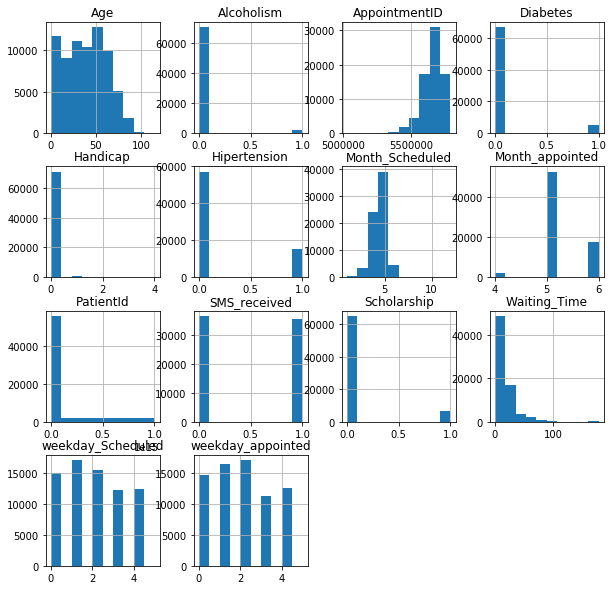

In [19]:
df.hist(figsize = (10,10));

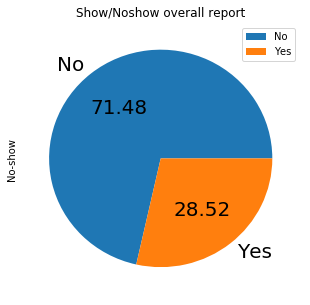

In [20]:
df['No-show'].value_counts().plot(kind = 'pie',figsize =(5,5), autopct='%.2f',fontsize=20)
plt.title('Show/Noshow overall report');
plt.legend();

About 71% of people have showed up while the other 29% unfortunalty did not

In [21]:
## Create a group to count values according to handicap grades and No show status
df.groupby(['Handicap','No-show']).count()

PatientId  AppointmentID  Gender  ScheduledDay  \
Handicap No-show                                                   
0        No           50464          50464   50464         50464   
         Yes          20188          20188   20188         20188   
1        No             888            888     888           888   
         Yes            297            297     297           297   
2        No              78             78      78            78   
         Yes             34             34      34            34   
3        No               6              6       6             6   
         Yes              2              2       2             2   
4        No               1              1       1             1   
         Yes              1              1       1             1   

                  AppointmentDay    Age  Neighbourhood  Scholarship  \
Handicap No-show                                                      
0        No                50464  50464          50464        50464   
         Yes               20188  20188          20188        20188   
1        No                  888    888            888          888   
         Yes                 297    297            297          297   
2        No                   78     78             78           78   
         Yes                  34     34             34           34   
3        No                    6      6              6            6   
         Yes                   2      2              2            2   
4        No                    1      1              1            1   
         Yes                   1      1              1            1   

                  Hipertension  Diabetes  Alcoholism  SMS_received  \
Handicap No-show                                                     
0        No              50464     50464       50464         50464   
         Yes             20188     20188       20188         20188   
1        No                888       888         888           888   
         Yes               297       297         297           297   
2        No                 78        78          78            78   
         Yes                34        34          34            34   
3        No                  6         6           6             6   
         Yes                 2         2           2             2   
4        No                  1         1           1             1   
         Yes                 1         1           1             1   

                  ScheduledDate  AppointmentDate  weekday_Scheduled  \
Handicap No-show                                                      
0        No               50464            50464              50464   
         Yes              20188            20188              20188   
1        No                 888              888                888   
         Yes                297              297                297   
2        No                  78               78                 78   
         Yes                 34               34                 34   
3        No                   6                6                  6   
         Yes                  2                2                  2   
4        No                   1                1                  1   
         Yes                  1                1                  1   

                  weekday_appointed  Month_Scheduled  Month_appointed  \
Handicap No-show                                                        
0        No                   50464            50464            50464   
         Yes                  20188            20188            20188   
1        No                     888              888              888   
         Yes                    297              297              297   
2        No                      78               78               78   
         Yes                     34               34               34   
3        No                       6                6                6 

**Handicap doesn't have a relation with no-show most of the patient who no-shows without handicap**

**Which age has a high frequency for no show?**

Text(0.5,0,'Patients Number')

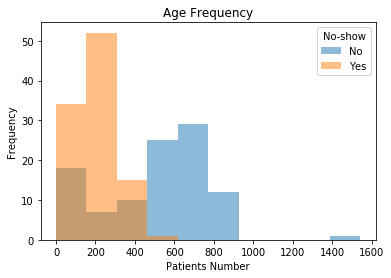

In [22]:
pd.crosstab(df['Age'],df['No-show']).plot(kind='hist',alpha=0.5);
plt.title('Age Frequency')
plt.xlabel('Patients Number')

**Most patients who have age more than 38 years have a high frequency for a no-show**

In [23]:
def axis_plot(c_name,title):
    ax = sns.countplot(x=df[c_name], hue=df['No-show'],data=df)
    ax.set_title(str(title))
    #x_ticks_labels=label
    #ax.set_xticklabels(x_ticks_labels)
    plt.show()

In [24]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'ScheduledDate', 'AppointmentDate', 'weekday_Scheduled',
       'weekday_appointed', 'Month_Scheduled', 'Month_appointed',
       'Waiting_Time'],
      dtype='object')

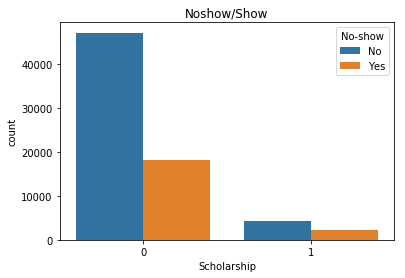

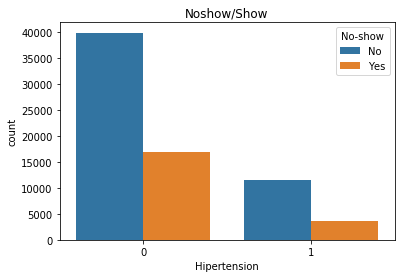

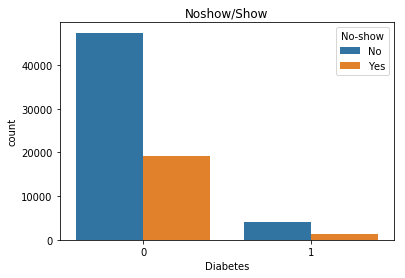

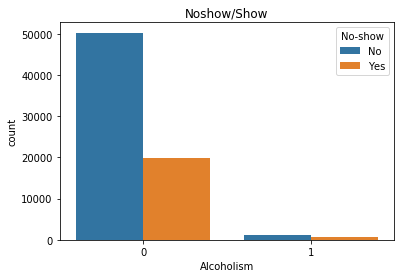

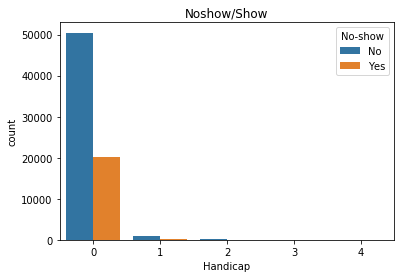

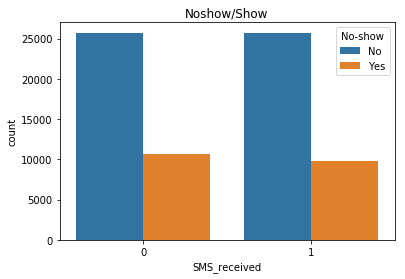

In [25]:
col = ['Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']
for i in col:
    #axis_plot(i,'Noshow/Show',['Male','Female'])
    axis_plot(i,'Noshow/Show')
    

**From the above interpretation , we can conclude that the 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received' doesnt affect the count of No-show**

In [26]:
df.Gender.value_counts(normalize=True) * 100


F    66.801929
M    33.198071
Name: Gender, dtype: float64

**Actually this is not surprising as we can see from people who make appointments in general 65% are females and 35% are men, we can see here that men need to pay more attnention to their health.**

**On which weekday/day/month maximum appointments are getting finalized with Show status?**

In [27]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'ScheduledDate', 'AppointmentDate', 'weekday_Scheduled',
       'weekday_appointed', 'Month_Scheduled', 'Month_appointed',
       'Waiting_Time'],
      dtype='object')

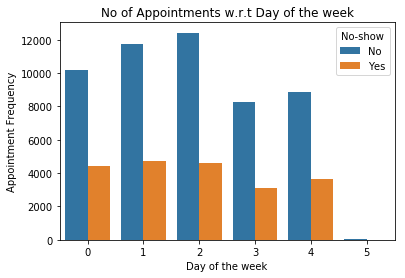

In [28]:
a_week = sns.countplot(x = 'weekday_appointed', hue = 'No-show', data = df)
a_week.set_title('No of Appointments w.r.t Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Appointment Frequency')
plt.show()

**When compared to weekends, majority of the appointments happend on the weeekdays**

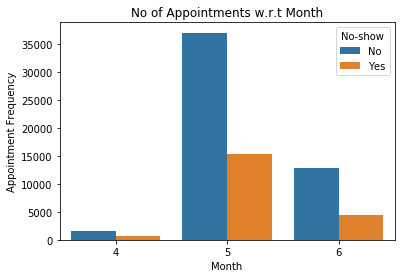

In [29]:
a_mnth = sns.countplot(x = 'Month_appointed', hue = 'No-show', data = df)
a_mnth.set_title('No of Appointments w.r.t Month')
plt.xlabel('Month')
plt.ylabel('Appointment Frequency')
plt.show()

**Majority of the appointments happend in the month of May**

## Limitations

- The data contained only for April to June. If we have full year data on monthly basis, we can actually identify the traffic months for physicians appointments

- If we had the data on how many SMS are sent to patient, we can actually find out that how many SMS reminders are required for a patient to get active for appointment.


<a id='conclusions'></a>
## Conclusions

As per this analysis we can conlcude that most of the females shown up at the time of appointment than men.
The SMS didnt make more impact on this appoinment.
About 80% of people have showed up while the other 20% unfortunalty did not


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0